# COSE461 Assignment 2: Word Vectors
### **Due 9:00 AM, Tue Apr 4**



To get started, make a copy of the assignment by clicking File->Save a copy in drive... or 파일->드라이브에 사본 저장. You will need to be logged into a Google account.

# Part 1: Understanding word2vec (written)
Let’s have a quick refresher on the `word2vec` algorithm. The key insight behind `word2vec` is that *‘a word
is known by the company it keeps’*. Concretely, suppose we have a ‘center’ word $c$ and a contextual window surrounding $c$. We shall refer to words that lie in this contextual window as ‘outside words’. For example,
in Figure 1 we see that the center word $c$ is ‘banking’. Since the context window size is 2, the outside words
are ‘turning’, ‘into’, ‘crises’, and ‘as’.

The goal of the skip-gram `word2vec` algorithm is to accurately learn the probability distribution $P(O|C)$.
Given a specific word $o$ and a specific word $c$, we want to calculate $P(O = o|C = c)$, which is the probability
that word $o$ is an ‘outside’ word for $c$, i.e., the probability that $o$ falls within the contextual window of $c$.


<div align=center>

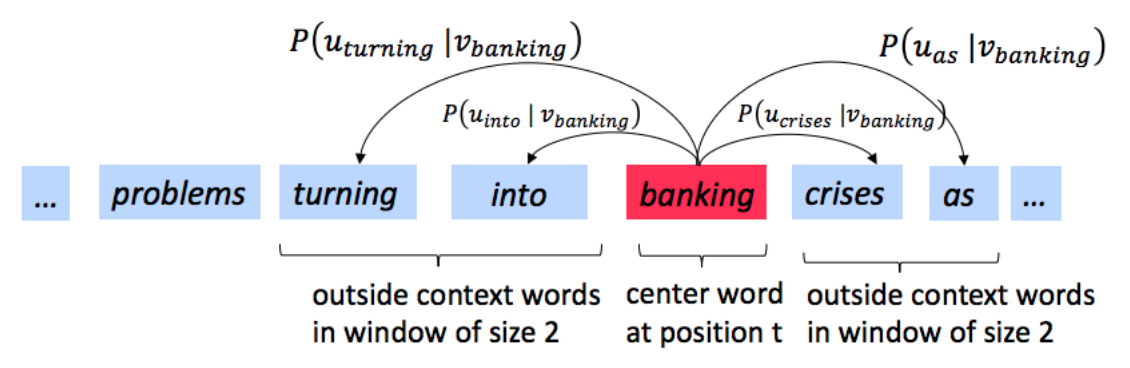

Figure 1: The word2vec skip-gram prediction model with window size 2

</div>

In `word2vec`, the conditional probability distribution is given by taking vector dot-products and applying the softmax function:

\begin{equation}
P(O=o|C=c)=\frac{\exp(\mathbf{u}_o^\top \mathbf{v}_c)}{\sum_{w\in Vocab}\exp(\mathbf{u}_w^\top \mathbf{v}_c)} \tag{1}
\end{equation}

Here, $\mathbf{u}_o$ is the ‘outside’ vector representing outside word $o$, and $\mathbf{v}_c$ is the ‘center’ vector representing center
word $c$. To contain these parameters, we have two matrices, $\mathbf{U}$ and $\mathbf{V}$ . The columns of $\mathbf{U}$ are all the ‘outside’
vectors $\mathbf{u}_w$. The columns of $\mathbf{V}$ are all of the ‘center’ vectors $\mathbf{v}_w$. Both $\mathbf{U}$ and $\mathbf{V}$ contain a vector for every $w ∈ Vocab$.[<sup id="fn1-back">1</sup>](#fn1 "footnote 1")

Recall from lectures that, for a single pair of words $c$ and $o$, the loss is given by:

\begin{equation}
J_{\text{naive-softmax}}(\mathbf{v}_c, o, \mathbf{U})=-\log P(O=o|C=c) \tag{2}
\end{equation}

We can view this loss as the cross-entropy[<sup id="fn2-back">2</sup>](#fn2 "footnote 2") between the true distribution $\mathbf{y}$ and the predicted distribution $\mathbf{\hat{y}}$.
Here, both $\mathbf{y}$ and $\mathbf{\hat{y}}$ are vectors with length equal to the number of words in the vocabulary. Furthermore, the $k^{th}$ entry in these vectors indicates the conditional probability of the $k^{th}$ word being an ‘outside word’ for the given $c$. The true empirical distribution $\mathbf{y}$ is a one-hot vector with a $1$ for the true outside word $o$,
and $0$ everywhere else. The predicted distribution $\mathbf{\hat{y}}$ is the probability distribution $P(O|C = c)$ given by our
model in equation $(1)$.



---



[<sup id="fn1">1</sup>](#fn1-back) Assume that every word in our vocabulary is matched to an integer number $k$. Bolded lowercase letters represent vectors.
$\mathbf{u}_k$ is both the $k^{th}$ column of $\mathbf{U}$ and the ‘outside’ word vector for the word indexed by $k$. $\mathbf{v}_k$ is both the $k$
th column of $\mathbf{V}$ and the ‘center’ word vector for the word indexed by $k$. **In order to simplify notation we shall interchangeably use $k$ to
refer to the word and the index-of-the-word.**

[<sup id="fn2">2</sup>](#fn2-back) The Cross Entropy Loss between the true (discrete) probability distribution $p$ and another distribution $q$ is $−\sum_i p_i \log(q_i)$.

---



## Question 1.1 (3 points)
Show that the naive-softmax loss given in Equation $(2)$ is the same as the cross-entropy loss between $\mathbf{y}$ and $\mathbf{\hat{y}}$; i.e. show that
\begin{equation}
-\sum_{w\in Vocab} y_w \log (\hat{y}_w)=-\log(\hat{y}_o).\tag{3}
\end{equation}
Your answer should be one line.




---


**Write your answer here. You can use `$` `$` signs around the letter to for inline equation and latex commands like `equation` or `align` for multi-line equations.**
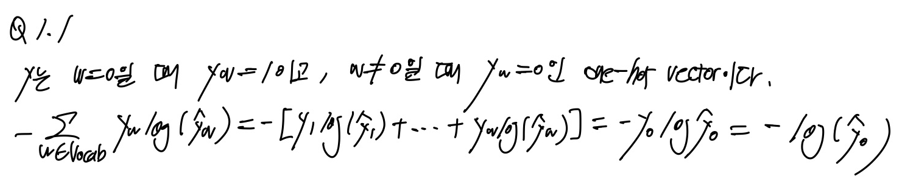

---
위 수식에서 알 수 있듯이 cross-entropy loss와 naive-softmax loss가 같은 것을 확인할 수 있다


## Question 1.2 (5 points)
Compute the partial derivative of $J_{\text{naive-softmax}}(\mathbf{v}_c,o,\mathbf{U})$ with respect to $\mathbf{v}_c$. Please write
your answer in terms of $\mathbf{y}$, $\mathbf{\hat{y}}$, and $\mathbf{U}$. Note that in this course, we expect your final answers to follow
the shape convention.[<sup id="fn3-back">3</sup>](#fn3 "footnote 3") This means that the partial derivative of any function $f(x)$ with respect to $x$
should have the same shape as $x$. For this question, please present your answer in vectorized form. In particular, you may not refer to specific elements of $\mathbf{y}$, $\mathbf{\hat{y}}$, and $\mathbf{U}$ in your final answer (such as $y_o$). We've covered this in class, so if you are not sure what to do, refer to lecture 1 slides and rewrite it nicely as requested.



---


**Write your answer here. You can use `$` `$` signs around the letter to for inline equation and latex commands like `equation` or `align` for multi-line equations.**
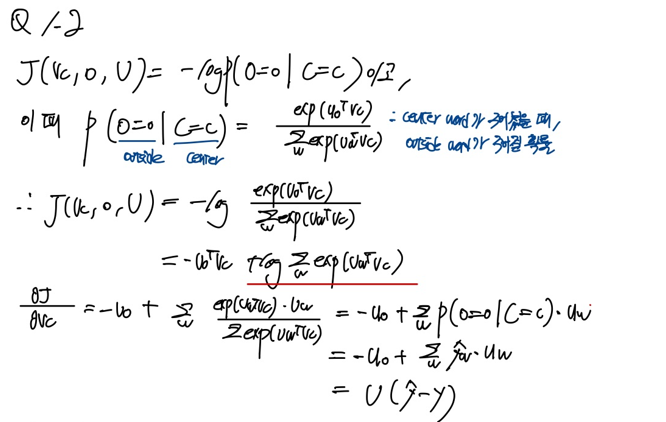



---



## Question 1.3 (5 points)
Compute the partial derivatives of $J_{\text{naive-softmax}}(\mathbf{v}_c,o,\mathbf{U})$ with respect to each of the ‘outside’
word vectors, $\mathbf{u}_w$’s. There will be two cases: when $w = o$, the true ‘outside’ word vector, and $w \neq o$,
for all other words. Please write your answer in terms of $\mathbf{y}$, $\mathbf{\hat{y}}$, and $\mathbf{v}_c$. In this question, you may use
specific elements within these terms as well (such as $y_o, y_c, ...$).


---


**Write your answer here. You can use `$` `$` signs around the letter to for inline equation and latex commands like `equation` or `align` for multi-line equations.**
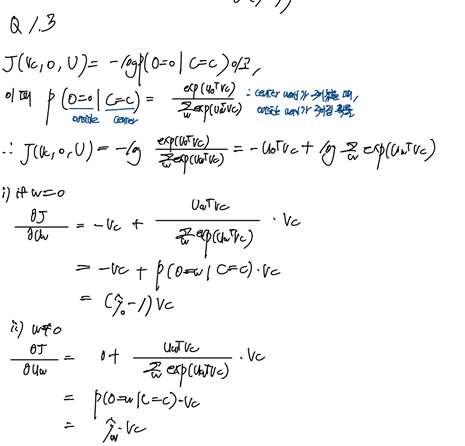
---

## Question 1.4 (1 points)
Compute the partial derivative of $J_{\text{naive-softmax}}(\mathbf{v}_c,o,\mathbf{U})$ with respect to $\mathbf{U}$. Please write your
answer in terms of $\frac{\partial J(\mathbf{v}_c,o,\mathbf{U})}{\partial \mathbf{u}_1}, \frac{\partial J(\mathbf{v}_c,o,\mathbf{U})}{\partial \mathbf{u}_2}, ..., \frac{\partial J(\mathbf{v}_c,o,\mathbf{U})}{\partial \mathbf{u}_{|Vocab|}}$
. The solution should be one or two lines long.



---


**Write your answer here. You can use `$` `$` signs around the letter to for inline equation and latex commands like `equation` or `align` for multi-line equations.**
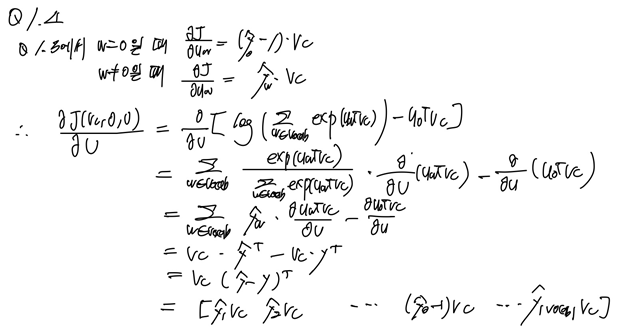


---



## Question 1.5 (3 points)
The sigmoid function is given by Equation $(4)$:
\begin{equation}
\sigma(x)=\frac{1}{1+\exp(-x)}=\frac{\exp(x)}{\exp(x)+1} \tag{4}
\end{equation}
Please compute the derivative of $\sigma(x)$ with respect to $x$, where $x$ is a scalar. Hint: you may want to write your answer in terms of $\sigma(x)$.



---


**Write your answer here. You can use `$` `$` signs around the letter to for inline equation and latex commands like `equation` or `align` for multi-line equations.**
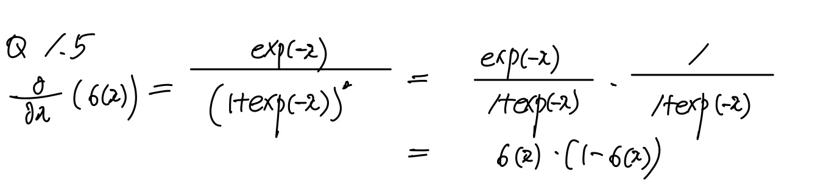


---



## Question 1.6 (4 points)
Now we shall consider the Negative Sampling loss, which is an alternative to the Naive Softmax loss. Assume that $K$ negative samples (words) are drawn from the vocabulary. For simplicity of notation we shall refer to them as $w_1, w_2,..., w_K$ and their outside vectors as $\mathbf{u}_1,...,\mathbf{u}_K$. For this
question, assume that the $K$ negative samples are distinct. In other words, $i\neq j$ implies $w_i\neq w_j$ for $i, j \in \{1, . . . , K\}$. Note that $o \notin \{w_1, ..., w_K\}$. For a center word $c$ and an outside word $o$, the
negative sampling loss function is given by:
\begin{equation}
J_{\text{neg-sample}}(\mathbf{v}_c, o, \mathbf{U})=-\log(\sigma(\mathbf{u}_o^\top \mathbf{v}_c))-\sum_{k=1}^K \log (\sigma(-\mathbf{u}_k^\top \mathbf{v}_c))
\end{equation}
for a sample $w_1, ..., w_K$, where $\sigma(\cdot)$ is the sigmoid function.[<sup id="fn4-back">4</sup>](#fn4 "footnote 4")

Please repeat question 1.2 and 1.3, computing the partial derivatives of $J_{\text{neg-sample}}$ with respect to $\mathbf{v}_c$,
with respect to $\mathbf{u}_o$, and with respect to a negative sample $\mathbf{u}_k$. Please write your answers in terms of the vectors $\mathbf{u}_o$, $\mathbf{v}_c$, and $\mathbf{u}_k$, where $k\in [1, K]$. After you’ve done this, describe with one sentence why this loss function is much more efficient to compute than the naive-softmax loss. Note, you should be able to use your solution to question 1.5 to help compute the necessary gradients here.



---


**Write your answer here. You can use `$` `$` signs around the letter to for inline equation and latex commands like `equation` or `align` for multi-line equations.**
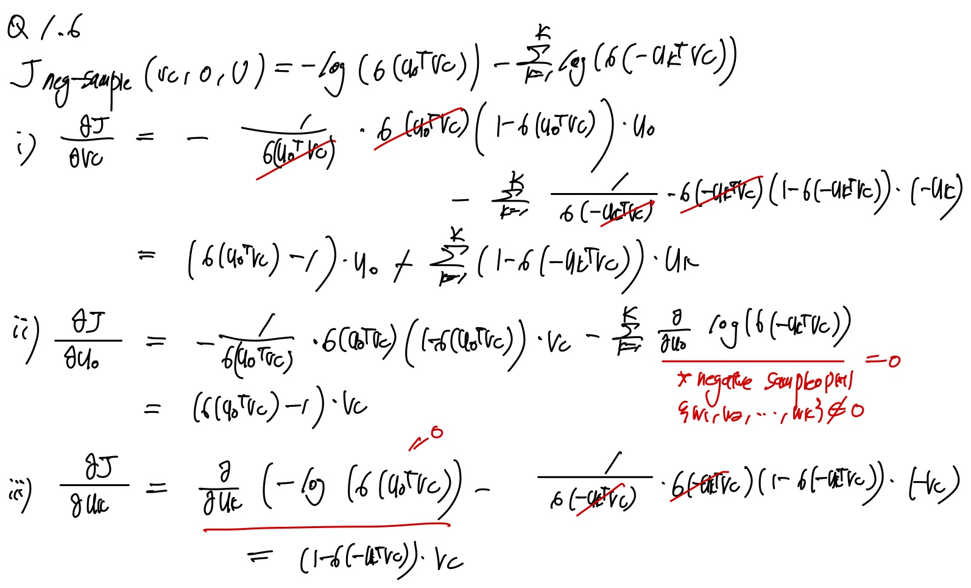

---
기존 방식인 naive-sofmax loss의 경우 normalizing하는 과정에서 모든 단어들에 대해 내적값을 구하여 지수승을 취한 뒤 더해줘야하기에 계산 비용이 많이 든다.
하지만, negative sampling의 경우 negative sample 몇 개(K개)만 뽑아서 내적값을 구하여 loss function을 계산하기에 상대적으로 연산 비용이 적다는 장점이 있다.





---



[<sup id="fn3">3</sup>](#fn3-back) This allows us to efficiently minimize a function using gradient descent without worrying about reshaping or dimension
mismatching. While following the shape convention, we’re guaranteed that $\theta:=\theta-\alpha \frac{\partial J(\theta)}{\partial \theta}$ is a well-defined update rule.

[<sup id="fn4">4</sup>](#fn4-back) Note: the loss function here is the negative of what Mikolov et al. had in their original paper, because we are doing a
minimization instead of maximization in our assignment code. Ultimately, this is the same objective function.

---



## Question 1.7 (2 points)
Now we will repeat the previous question, but without the assumption that the $K$ sampled words are distinct. Assume that $K$ negative samples (words) are drawn from the vocabulary. For simplicity of notation we shall refer to them as $w_1, w_2, ..., w_K$ and their outside vectors as $\mathbf{u}_1,...,\mathbf{u}_K$. In this question, you may not assume that the words are distinct. In other words, $w_i = w_j$ may be true when $i\neq j$ is true. Note that $o\notin \{w_1,...,w_K \}$. For a center word $c$ and an outside word $o$, the
negative sampling loss function is given by:
\begin{equation}
J_{\text{neg-sample}}(\mathbf{v}_c, o, \mathbf{U})=-\log(\sigma(\mathbf{u}_o^\top \mathbf{v}_c))-\sum_{k=1}^K \log (\sigma(-\mathbf{u}_k^\top \mathbf{v}_c))
\end{equation}
for a sample $w_1, ..., w_K$, where $\sigma(\cdot)$ is the sigmoid function.

Compute the partial derivative of $J_{\text{neg-sample}}$ with respect to a negative sample $\mathbf{u}_k$. Please write your
answers in terms of the vectors $\mathbf{v}_c$ and $\mathbf{u}_k$, where $k\in [1, K]$. Hint: break up the sum in the loss function into two sums: a sum over all sampled words equal to $\mathbf{u}_k$ and a sum over all sampled words
not equal to $\mathbf{u}_k$.




---


**Write your answer here. You can use `$` `$` signs around the letter to for inline equation and latex commands like `equation` or `align` for multi-line equations.**
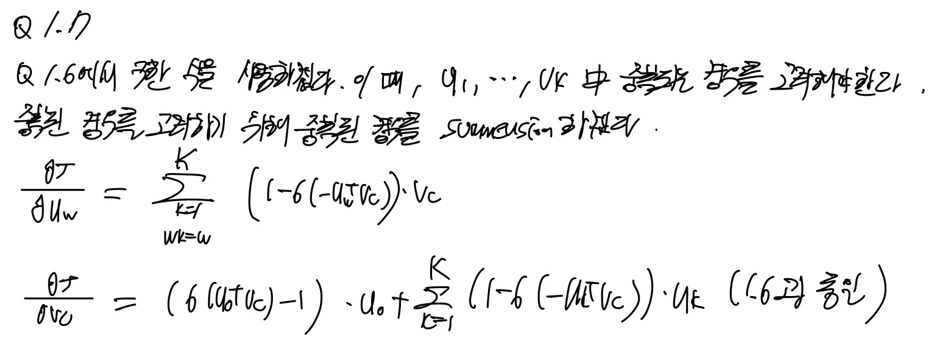


---



## Question 1.8 (3 points)
Suppose the center word is $c=w_t$ and the context window is $[w_{t-m}, ..., w_{t-1}, w_t, w_{t+1}, ..., w_{t+m}]$, where $m$ is the context window size. Recall that for the skip-gram version of `word2vec`, the total loss for the context window is:
\begin{equation}
J_{\text{skip-gram}}(\mathbf{v}_c,w_{t-m}, ..., w_{t+m}, \mathbf{U})=\sum_{-m\le j \le m \\~~~~~~j\neq 0} J(\mathbf{v}, w_{t+j}, \mathbf{U}) \tag{7}
\end{equation}
Here, $J(\mathbf{v}_c,w_{t+j},\mathbf{U})$ represents an arbitrary loss term for the center word $c=w_t$ and outside word $w_{t+j}$. $J(\mathbf{v}_c, w_{t+j}, \mathbf{U})$ could be $J_{\text{naive-softmax}}(\mathbf{v}_c, w_{t+j}, \mathbf{U})$ or $J_{\text{neg-sample}}(\mathbf{v}_c, w_{t+j}, \mathbf{U})$, depending on your implementation.

Write down three partial derivatives:


1.   $\frac{\partial J_{\text{skip-gram}}(\mathbf{v}_c,w_{t-m}, ...,w_{t+m}, \mathbf{U})}{\partial \mathbf{U}}$
2.   $\frac{\partial J_{\text{skip-gram}}(\mathbf{v}_c,w_{t-m}, ...,w_{t+m}, \mathbf{U})}{\partial \mathbf{v}_c}$
3.   $\frac{\partial J_{\text{skip-gram}}(\mathbf{v}_c,w_{t-m}, ...,w_{t+m}, \mathbf{U})}{\partial \mathbf{v}_w}$ when $w\neq c$

Write your answers in terms of $\frac{\partial J(\mathbf{v}_c,w_{t+j},\mathbf{U})}{\partial \mathbf{U}}$ and $\frac{\partial J(\mathbf{v}_c,w_{t+j},\mathbf{U})}{\partial \mathbf{v}_c}$. This is very simple - each solution should be one line.




---


**Write your answer here. You can use `$` `$` signs around the letter to for inline equation and latex commands like `equation` or `align` for multi-line equations.**
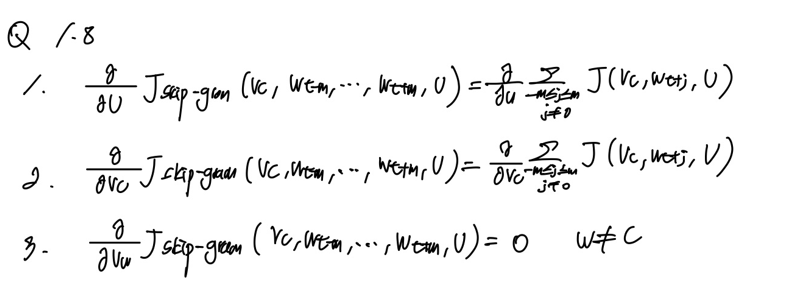

---



**Once you're done:** Given that you computed the derivatives of $J(\mathbf{v}_c, w_{t+j}, \mathbf{U})$ with respect to all the model parameters $\mathbf{U}$ and $\mathbf{V}$ in the previous questions, you now computed the derivations of the full loss function $J_{\text{skip-gram}}$ with respect to all parameters. You're now ready to implement `word2vec`!

# Part 2: Implementing word2vec (coding)

In this part, you will implement the `word2vec` model and train your own word vectors with stochastic gradient descent (SGD). Note that you probably want to finish the previous math section before writing the code since you will be asked to implement the math functions in Python. You want to implement and test the following questions in order since they are accumulative.

For each of the methods you need to implement, we included approximately how many lines of code our solution has in the code comments. These numbers are included to guide you. You don’t have to stick to
them, you can write shorter or longer code as you wish. If you think your implementation is significantly longer than ours, it is a signal that there are some `numpy` methods you could utilize to make your code both
shorter and faster. `for` loops in Python take a long time to complete when used over large arrays, so we expect you to utilize `numpy` methods.

You can refer to [here](https://github.com/ku-dmlab/COSE461_a2_utils) if you are curious about the utility functions used in the following.

In [ ]:
!git clone https://github.com/ku-dmlab/COSE461_a2_utils.git

Cloning into 'COSE461_a2_utils'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 7 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 5.12 KiB | 5.12 MiB/s, done.


**Run the below code once; the following code includes import statements and helper functions required for further questions.**

In [ ]:
import random
import numpy as np
from COSE461_a2_utils.gradcheck import gradcheck_naive, grad_tests_softmax, grad_tests_negsamp
from COSE461_a2_utils.utils import normalizeRows, softmax

def getDummyObjects():
    """ Helper method for naiveSoftmaxLossAndGradient and negSamplingLossAndGradient tests """

    def dummySampleTokenIdx():
        return random.randint(0, 4)

    def getRandomContext(C):
        tokens = ["a", "b", "c", "d", "e"]
        return tokens[random.randint(0,4)], \
            [tokens[random.randint(0,4)] for i in range(2*C)]

    dataset = type('dummy', (), {})()
    dataset.sampleTokenIdx = dummySampleTokenIdx
    dataset.getRandomContext = getRandomContext

    random.seed(31415)
    np.random.seed(9265)
    dummy_vectors = normalizeRows(np.random.randn(10,3))
    dummy_tokens = dict([("a",0), ("b",1), ("c",2),("d",3),("e",4)])

    return dataset, dummy_vectors, dummy_tokens

def getNegativeSamples(outsideWordIdx, dataset, K):
    """ Samples K indexes which are not the outsideWordIdx """

    negSampleWordIndices = [None] * K
    for k in range(K):
        newidx = dataset.sampleTokenIdx()
        while newidx == outsideWordIdx:
            newidx = dataset.sampleTokenIdx()
        negSampleWordIndices[k] = newidx
    return negSampleWordIndices

def word2vec_sgd_wrapper(word2vecModel, word2Ind, wordVectors, dataset,
                         windowSize,
                         word2vecLossAndGradient=None):
    batchsize = 50
    loss = 0.0
    grad = np.zeros(wordVectors.shape)
    N = wordVectors.shape[0]
    centerWordVectors = wordVectors[:int(N/2),:]
    outsideVectors = wordVectors[int(N/2):,:]
    for i in range(batchsize):
        windowSize1 = random.randint(1, windowSize)
        centerWord, context = dataset.getRandomContext(windowSize1)

        c, gin, gout = word2vecModel(
            centerWord, windowSize1, context, word2Ind, centerWordVectors,
            outsideVectors, dataset, word2vecLossAndGradient
        )
        loss += c / batchsize
        grad[:int(N/2), :] += gin / batchsize
        grad[int(N/2):, :] += gout / batchsize

    return loss, grad

## Question 2.1 (1 points)
Implement the `sigmoid` method, which takes in a vector and applies the sigmoid function to it.

In [ ]:
def sigmoid(x):
    """
    Compute the sigmoid function for the input here.
    Arguments:
    x -- A scalar or numpy array.
    Return:
    s -- sigmoid(x)
    """

    ### YOUR CODE HERE (~1 Line)
    s= 1 / (1+np.exp(-x))
    ### END YOUR CODE

    return s

The code below is to test your `sigmoid` function (for sanity check only).

In [ ]:
""" Test sigmoid function """
print("=== Sanity check for sigmoid ===")
assert sigmoid(0) == 0.5
assert np.allclose(sigmoid(np.array([0])), np.array([0.5]))
assert np.allclose(sigmoid(np.array([1,2,3])), np.array([0.73105858, 0.88079708, 0.95257413]))
print("Tests for sigmoid passed!")

=== Sanity check for sigmoid ===
Tests for sigmoid passed!


## Question 2.2 (4 points)
Implement the following: softmax loss and gradient in the `naiveSoftmaxLossAndGradient` method.

In [ ]:
def naiveSoftmaxLossAndGradient(
    centerWordVec,
    outsideWordIdx,
    outsideVectors,
    dataset
):
    """ Naive Softmax loss & gradient function for word2vec models

    Implement the naive softmax loss and gradients between a center word's
    embedding and an outside word's embedding. This will be the building block
    for our word2vec models. For those unfamiliar with numpy notation, note
    that a numpy ndarray with a shape of (x, ) is a one-dimensional array, which
    you can effectively treat as a vector with length x.

    Arguments:
    centerWordVec -- numpy ndarray, center word's embedding
                    in shape (word vector length, )
                    (v_c in the part 1)
    outsideWordIdx -- integer, the index of the outside word
                    (o of u_o in the part 1)
    outsideVectors -- outside vectors is
                    in shape (num words in vocab, word vector length)
                    for all words in vocab (tranpose of U in the part 1)
    dataset -- needed for negative sampling, unused here.

    Return:
    loss -- naive softmax loss
    gradCenterVec -- the gradient with respect to the center word vector
                     in shape (word vector length, )
                     (dJ / dv_c in the part 1)
    gradOutsideVecs -- the gradient with respect to all the outside word vectors
                    in shape (num words in vocab, word vector length)
                    (dJ / dU)
    """

    ### YOUR CODE HERE (~5-8 Lines)
    ### Please use the provided softmax function (imported earlier in this file)
    ### This numerically stable implementation helps you avoid issues pertaining
    ### to integer overflow.

    y_hat = softmax(centerWordVec @ outsideVectors.T) #(w, )
    y = np.zeros_like(y_hat)
    y[outsideWordIdx] = 1
    loss = -np.log(y_hat[outsideWordIdx])
    gradCenterVec = (y_hat - y) @ outsideVectors #(w, ) @ (w,d) -> (d, )
    gradOutsideVecs = np.outer((y_hat-y) , centerWordVec)
    ### END YOUR CODE

    return loss, gradCenterVec, gradOutsideVecs


The code below is to test your `naiveSoftmaxLossAndGradient`  (for sanity check only).

In [ ]:
""" Test naiveSoftmaxLossAndGradient """
dataset, dummy_vectors, dummy_tokens = getDummyObjects()

print("==== Gradient check for naiveSoftmaxLossAndGradient ====")
def temp(vec):
    loss, gradCenterVec, gradOutsideVecs = naiveSoftmaxLossAndGradient(vec, 1, dummy_vectors, dataset)
    return loss, gradCenterVec
gradcheck_naive(temp, np.random.randn(3), "naiveSoftmaxLossAndGradient gradCenterVec")

centerVec = np.random.randn(3)
def temp(vec):
    loss, gradCenterVec, gradOutsideVecs = naiveSoftmaxLossAndGradient(centerVec, 1, vec, dataset)
    return loss, gradOutsideVecs
gradcheck_naive(temp, dummy_vectors, "naiveSoftmaxLossAndGradient gradOutsideVecs")

==== Gradient check for naiveSoftmaxLossAndGradient ====
Gradient check passed!. Read the docstring of the `gradcheck_naive` method in utils.gradcheck.py to understand what the gradient check does.
Gradient check passed!. Read the docstring of the `gradcheck_naive` method in utils.gradcheck.py to understand what the gradient check does.


## Question 2.3 (4 points)
Implement the following: negative sampling loss and gradient in the `negSamplingLossAndGradient` method.

In [ ]:
def negSamplingLossAndGradient(
    centerWordVec,
    outsideWordIdx,
    outsideVectors,
    dataset,
    K=10
):
    """ Negative sampling loss function for word2vec models

    Implement the negative sampling loss and gradients for a centerWordVec
    and a outsideWordIdx word vector as a building block for word2vec
    models. K is the number of negative samples to take.

    Note: The same word may be negatively sampled multiple times. For
    example if an outside word is sampled twice, you shall have to
    double count the gradient with respect to this word. Thrice if
    it was sampled three times, and so forth.

    Arguments/Return Specifications: same as naiveSoftmaxLossAndGradient
    """

    # Negative sampling of words is done for you. Do not modify this!
    negSampleWordIndices = getNegativeSamples(outsideWordIdx, dataset, K)
    indices = [outsideWordIdx] + negSampleWordIndices

    ### YOUR CODE HERE (~10 Lines)
    ### Please use your implementation of sigmoid in here.
    un, idx, n_reps = np.unique(indices, return_index=True, return_counts=True)
    U_cat=outsideVectors[un]

    U_cat[idx!=0]*=-1
    n_reps[idx==0]*=-1
    S=sigmoid(centerWordVec @ U_cat.T) #(d,) @ (d,w) -> (w, )

    loss=-(np.abs(n_reps) * np.log(S)).sum()
    gradCenterVec=(np.abs(n_reps) * (1-S)) @ -U_cat
    gradOutsideVecs = np.zeros_like(outsideVectors)
    gradOutsideVecs[un] = n_reps[:, None] * np.outer(1-S, centerWordVec)


    ### END YOUR CODE

    return loss, gradCenterVec, gradOutsideVecs


The code below is to test your `negSamplingLossAndGradient`  (for sanity check only).

In [ ]:
""" Test negSamplingLossAndGradient """
dataset, dummy_vectors, dummy_tokens = getDummyObjects()

print("==== Gradient check for negSamplingLossAndGradient ====")
def temp(vec):
    loss, gradCenterVec, gradOutsideVecs = negSamplingLossAndGradient(vec, 1, dummy_vectors, dataset)
    return loss, gradCenterVec
gradcheck_naive(temp, np.random.randn(3), "negSamplingLossAndGradient gradCenterVec")

centerVec = np.random.randn(3)
def temp(vec):
    loss, gradCenterVec, gradOutsideVecs = negSamplingLossAndGradient(centerVec, 1, vec, dataset)
    return loss, gradOutsideVecs
gradcheck_naive(temp, dummy_vectors, "negSamplingLossAndGradient gradOutsideVecs")

==== Gradient check for negSamplingLossAndGradient ====
Gradient check passed!. Read the docstring of the `gradcheck_naive` method in utils.gradcheck.py to understand what the gradient check does.
Gradient check passed!. Read the docstring of the `gradcheck_naive` method in utils.gradcheck.py to understand what the gradient check does.


## Question 2.4 (3 points)
Implement the following: skip-gram model in the `skipgram` method.

In [ ]:
def skipgram(currentCenterWord, windowSize, outsideWords, word2Ind,
             centerWordVectors, outsideVectors, dataset,
             word2vecLossAndGradient=naiveSoftmaxLossAndGradient):
    """ Skip-gram model in word2vec

    Implement the skip-gram model in this function.

    Arguments:
    currentCenterWord -- a string of the current center word
    windowSize -- integer, context window size
    outsideWords -- list of no more than 2*windowSize strings, the outside words
    word2Ind -- a dictionary that maps words to their indices in
              the word vector list
    centerWordVectors -- center word vectors (as rows) is in shape
                        (num words in vocab, word vector length)
                        for all words in vocab (V in part 1)
    outsideVectors -- outside vectors is in shape
                        (num words in vocab, word vector length)
                        for all words in vocab (transpose of U in part 1)
    word2vecLossAndGradient -- the loss and gradient function for
                               a prediction vector given the outsideWordIdx
                               word vectors, could be one of the two
                               loss functions you implemented above.

    Return:
    loss -- the loss function value for the skip-gram model
            (J in part 1)
    gradCenterVec -- the gradient with respect to the center word vector
                     in shape (word vector length, )
                     (dJ / dv_c in part 1)
    gradOutsideVecs -- the gradient with respect to all the outside word vectors
                    in shape (num words in vocab, word vector length)
                    (dJ / dU)
    """

    loss = 0.0
    gradCenterVecs = np.zeros(centerWordVectors.shape)
    gradOutsideVecs = np.zeros(outsideVectors.shape)

    ### YOUR CODE HERE (~8 Lines)
    centerWordIdx = word2Ind[currentCenterWord]
    centerWordVec = centerWordVectors[centerWordIdx]

    for outsideWord in outsideWords:
      lossi, gradCenterVeci, gradOutsideVectori =  word2vecLossAndGradient(centerWordVec, word2Ind[outsideWord], outsideVectors, dataset)

      # Update values
      loss+=lossi
      gradCenterVecs[centerWordIdx] += gradCenterVeci
      gradOutsideVecs += gradOutsideVectori

    ### END YOUR CODE

    return loss, gradCenterVecs, gradOutsideVecs

The code below is to test your `skipgram` (for sanity check only).

In [ ]:
""" Test skip-gram with naiveSoftmaxLossAndGradient """
dataset, dummy_vectors, dummy_tokens = getDummyObjects()

print("==== Gradient check for skip-gram with naiveSoftmaxLossAndGradient ====")
gradcheck_naive(lambda vec: word2vec_sgd_wrapper(
    skipgram, dummy_tokens, vec, dataset, 5, naiveSoftmaxLossAndGradient),
    dummy_vectors, "naiveSoftmaxLossAndGradient Gradient")
grad_tests_softmax(skipgram, dummy_tokens, dummy_vectors, dataset)

print("==== Gradient check for skip-gram with negSamplingLossAndGradient ====")
gradcheck_naive(lambda vec: word2vec_sgd_wrapper(
    skipgram, dummy_tokens, vec, dataset, 5, negSamplingLossAndGradient),
    dummy_vectors, "negSamplingLossAndGradient Gradient")
grad_tests_negsamp(skipgram, dummy_tokens, dummy_vectors, dataset, negSamplingLossAndGradient)

==== Gradient check for skip-gram with naiveSoftmaxLossAndGradient ====
Gradient check passed!. Read the docstring of the `gradcheck_naive` method in utils.gradcheck.py to understand what the gradient check does.
======Skip-Gram with naiveSoftmaxLossAndGradient Test Cases======
The first test passed!
The second test passed!
The third test passed!
All 3 tests passed!
==== Gradient check for skip-gram with negSamplingLossAndGradient ====
Gradient check passed!. Read the docstring of the `gradcheck_naive` method in utils.gradcheck.py to understand what the gradient check does.
======Skip-Gram with negSamplingLossAndGradient======
The first test passed!
The second test passed!
The third test passed!
All 3 tests passed!





---


**You have successfully implemented `word2vec` model! Before continuing, run the below once: they are import statements and helper functions for `sgd`.**

In [ ]:
# Save parameters every a few SGD iterations as fail-safe
SAVE_PARAMS_EVERY = 5000

import pickle
import glob
import random
import numpy as np
import os.path as op

def load_saved_params():
    """
    A helper function that loads previously saved parameters and resets
    iteration start.
    """
    st = 0
    for f in glob.glob("saved_params_*.npy"):
        iter = int(op.splitext(op.basename(f))[0].split("_")[2])
        if (iter > st):
            st = iter

    if st > 0:
        params_file = "saved_params_%d.npy" % st
        state_file = "saved_state_%d.pickle" % st
        params = np.load(params_file)
        with open(state_file, "rb") as f:
            state = pickle.load(f)
        return st, params, state
    else:
        return st, None, None


def save_params(iter, params):
    params_file = "saved_params_%d.npy" % iter
    np.save(params_file, params)
    with open("saved_state_%d.pickle" % iter, "wb") as f:
        pickle.dump(random.getstate(), f)

## Question 2.5 (4 points)
Complete the implementation for your SGD optimizer in the `sgd` method in the followings.

In [ ]:
def sgd(f, x0, step, iterations, postprocessing=None, useSaved=False,
        PRINT_EVERY=10):
    """ Stochastic Gradient Descent

    Implement the stochastic gradient descent method in this function.

    Arguments:
    f -- the function to optimize, it should take a single
         argument and yield two outputs, a loss and the gradient
         with respect to the arguments
    x0 -- the initial point to start SGD from
    step -- the step size for SGD
    iterations -- total iterations to run SGD for
    postprocessing -- postprocessing function for the parameters
                      if necessary. In the case of word2vec we will need to
                      normalize the word vectors to have unit length.
    PRINT_EVERY -- specifies how many iterations to output loss

    Return:
    x -- the parameter value after SGD finishes
    """

    # Anneal learning rate every several iterations
    ANNEAL_EVERY = 20000

    if useSaved:
        start_iter, oldx, state = load_saved_params()
        if start_iter > 0:
            x0 = oldx
            step *= 0.5 ** (start_iter / ANNEAL_EVERY)

        if state:
            random.setstate(state)
    else:
        start_iter = 0

    x = x0

    if not postprocessing:
        postprocessing = lambda x: x

    exploss = None

    for iter in range(start_iter + 1, iterations + 1):
        # You might want to print the progress every few iterations.

        loss = None
        ### YOUR CODE HERE (~2 lines)
        loss, dx = f(x)
        x -= step * dx


        ### END YOUR CODE

        x = postprocessing(x)
        if iter % PRINT_EVERY == 0:
            if not exploss:
                exploss = loss
            else:
                exploss = .95 * exploss + .05 * loss
            print("iter %d: %f" % (iter, exploss))

        if iter % SAVE_PARAMS_EVERY == 0 and useSaved:
            save_params(iter, x)

        if iter % ANNEAL_EVERY == 0:
            step *= 0.5

    return x


The code below is to test your `sgd` (for sanity check only).

In [ ]:
quad = lambda x: (np.sum(x ** 2), x * 2)

print("Running sanity checks...")
t1 = sgd(quad, 0.5, 0.01, 1000, PRINT_EVERY=100)
print("test 1 result:", t1)
assert abs(t1) <= 1e-6

t2 = sgd(quad, 0.0, 0.01, 1000, PRINT_EVERY=100)
print("test 2 result:", t2)
assert abs(t2) <= 1e-6

t3 = sgd(quad, -1.5, 0.01, 1000, PRINT_EVERY=100)
print("test 3 result:", t3)
assert abs(t3) <= 1e-6

print("-" * 40)
print("ALL TESTS PASSED")
print("-" * 40)

Running sanity checks...
iter 100: 0.004578
iter 200: 0.004353
iter 300: 0.004136
iter 400: 0.003929
iter 500: 0.003733
iter 600: 0.003546
iter 700: 0.003369
iter 800: 0.003200
iter 900: 0.003040
iter 1000: 0.002888
test 1 result: 8.414836786079764e-10
iter 100: 0.000000
iter 200: 0.000000
iter 300: 0.000000
iter 400: 0.000000
iter 500: 0.000000
iter 600: 0.000000
iter 700: 0.000000
iter 800: 0.000000
iter 900: 0.000000
iter 1000: 0.000000
test 2 result: 0.0
iter 100: 0.041205
iter 200: 0.039181
iter 300: 0.037222
iter 400: 0.035361
iter 500: 0.033593
iter 600: 0.031913
iter 700: 0.030318
iter 800: 0.028802
iter 900: 0.027362
iter 1000: 0.025994
test 3 result: -2.524451035823933e-09
----------------------------------------
ALL TESTS PASSED
----------------------------------------


## Question 2.6 (2 points)
Show time! Now we are going to load some real data and train word vectors with everything you just implemented! We are going to use the Stanford Sentiment Treebank (SST) dataset to train word vectors, and later apply them to a simple sentiment analysis task.

You will need to fetch the datasets first: run the following.

In [ ]:
!wget http://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip
!unzip stanfordSentimentTreebank.zip
!rm stanfordSentimentTreebank.zip
!rm __MACOSX/ -r
!mkdir -p utils/datasets
!mv stanfordSentimentTreebank utils/datasets/stanfordSentimentTreebank

--2025-03-28 06:55:56--  http://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip [following]
--2025-03-28 06:55:56--  https://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6372817 (6.1M) [application/zip]
Saving to: ‘stanfordSentimentTreebank.zip’

stanfordSentimentTr 100%[===================>]   6.08M  1.08MB/s    in 5.6s    

2025-03-28 06:56:03 (1.08 MB/s) - ‘stanfordSentimentTreebank.zip’ saved [6372817/6372817]

Archive:  stanfordSentimentTreebank.zip
   creating: stanfordSentimentTreebank/
  inflating: stanfordSentimentTreebank/datasetSentences.txt  
   creating: 

There is no additional code to write for this part; just run the code below.
Note: The training process may take a long time depending on the efficiency of your implementation and the compute power of your machine **(an efficient implementation takes about two hours; plan accordingly)**. After 40,000 iterations, the script will finish and a visualization for your word vectors will appear. Briefly explain in at most three sentences what you see in the plot.



iter 10: 19.061546
iter 20: 19.114918
iter 30: 19.287617
iter 40: 19.352559
iter 50: 19.559119
iter 60: 19.717223
iter 70: 19.829304
iter 80: 19.829040
iter 90: 19.912663
iter 100: 19.847231
iter 110: 19.945194
iter 120: 20.068754
iter 130: 20.132756
iter 140: 20.246932
iter 150: 20.248652
iter 160: 20.181659
iter 170: 20.415366
iter 180: 20.523050
iter 190: 20.663462
iter 200: 20.735856
iter 210: 20.850365
iter 220: 20.768547
iter 230: 20.881432
iter 240: 20.874317
iter 250: 20.913310
iter 260: 21.095210
iter 270: 21.252756
iter 280: 21.158454
iter 290: 21.122248
iter 300: 21.194580
iter 310: 21.110808
iter 320: 21.122705
iter 330: 21.156881
iter 340: 21.135975
iter 350: 21.253348
iter 360: 21.273378
iter 370: 21.261887
iter 380: 21.159479
iter 390: 21.123175
iter 400: 21.256452
iter 410: 21.222920
iter 420: 21.305461
iter 430: 21.338125
iter 440: 21.254769
iter 450: 21.099340
iter 460: 21.149976
iter 470: 21.098907
iter 480: 21.073269
iter 490: 21.109938
iter 500: 20.961747
iter 510:

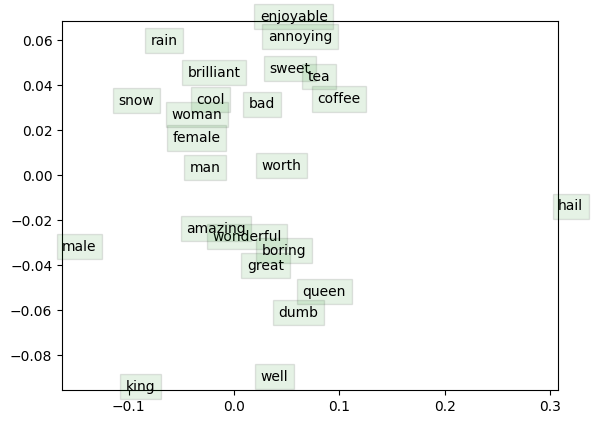

In [ ]:
%matplotlib inline
import random
import numpy as np
from COSE461_a2_utils.treebank import StanfordSentiment
import matplotlib
import matplotlib.pyplot as plt
import time

# Reset the random seed to make sure that everyone gets the same results
random.seed(314)
dataset = StanfordSentiment()
tokens = dataset.tokens()
nWords = len(tokens)

# We are going to train 10-dimensional vectors for this assignment
dimVectors = 10

# Context size
C = 5

# Reset the random seed to make sure that everyone gets the same results
random.seed(31415)
np.random.seed(9265)

startTime=time.time()
wordVectors = np.concatenate(
    ((np.random.rand(nWords, dimVectors) - 0.5) /
       dimVectors, np.zeros((nWords, dimVectors))),
    axis=0)
wordVectors = sgd(
    lambda vec: word2vec_sgd_wrapper(skipgram, tokens, vec, dataset, C,
        negSamplingLossAndGradient),
    wordVectors, 0.3, 40000, None, True, PRINT_EVERY=10)
# Note that normalization is not called here. This is not a bug,
# normalizing during training loses the notion of length.

print("sanity check: cost at convergence should be around or below 10")
print("training took %d seconds" % (time.time() - startTime))

# concatenate the input and output word vectors
wordVectors = np.concatenate(
    (wordVectors[:nWords,:], wordVectors[nWords:,:]),
    axis=0)

visualizeWords = [
    "great", "cool", "brilliant", "wonderful", "well", "amazing",
    "worth", "sweet", "enjoyable", "boring", "bad", "dumb",
    "annoying", "female", "male", "queen", "king", "man", "woman", "rain", "snow",
    "hail", "coffee", "tea"]

visualizeIdx = [tokens[word] for word in visualizeWords]
visualizeVecs = wordVectors[visualizeIdx, :]
temp = (visualizeVecs - np.mean(visualizeVecs, axis=0))
covariance = 1.0 / len(visualizeIdx) * temp.T.dot(temp)
U,S,V = np.linalg.svd(covariance)
coord = temp.dot(U[:,0:2])

for i in range(len(visualizeWords)):
    plt.text(coord[i,0], coord[i,1], visualizeWords[i],
        bbox=dict(facecolor='green', alpha=0.1))

plt.xlim((np.min(coord[:,0]), np.max(coord[:,0])))
plt.ylim((np.min(coord[:,1]), np.max(coord[:,1])))
plt.show()
#plt.savefig('word_vectors.png')




---


**Write your answer here. You can write in either Korean or English.**


---
위 그림을 통해 학습 후에 몇몇 좋은 클러스터들이 형성된 것을 확인할 수있다. 예를 들어, “great”, “amazing”, “wonderful”과 같이 사물이나 사건을 묘사하는 데 자주 쓰이는 단어들이 서로 가깝게 위치해 있으며, 또 다른 클러스터로는 “man”과 “woman”, “tea”와 “coffee”처럼 보통 함께 등장하는 단어들이 있다. 또한 “enjoyable”과 “annoying”, “boring”과 “great”, "cool"과 "bad"처럼 반의어인 단어들이 서로 너무 멀리 떨어져 있지 않다는 점도 흥미롭다. 그러나 “hail”과 같은 이상치(outlier)도 존재하며, “male”과 “female”, “king”과 “queen”처럼 자주 함께 등장하는 단어들은 서로 더 가까이 위치해야 한다.



#### Congratulations on finishing Assignment 2.

# Submission Instructions


1.   Click File -> Save or 파일-> 저장 to save.
2.   Run the code cell below. It requires to mount your Google Drive to VM, so authorize as instructed.
3.   `.html` file will be automatically downloaded (allow the permission to download file if asked). Submit your `.html` file on Blackboard.



In [ ]:
from google.colab import drive, files
from requests import get
from socket import gethostname, gethostbyname

drive.mount('/mnt/')
ip = gethostbyname(gethostname()) # 172.28.0.12
filename = get(f"http://{ip}:9000/api/sessions").json()[0]["name"]

filepath = f'/mnt/My Drive/Colab Notebooks/{filename}'
output_file = f'/mnt/My Drive/Colab Notebooks/Assignment2.html'

!jupyter nbconvert '{filepath}' --to html --output '{output_file}'
!cp '{output_file}' '/content/'
files.download('/content/Assignment2.html')

Drive already mounted at /mnt/; to attempt to forcibly remount, call drive.mount("/mnt/", force_remount=True).
[NbConvertApp] Converting notebook /mnt/My Drive/Colab Notebooks/Assignment2_2020170831.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 1771985 bytes to /mnt/My Drive/Colab Notebooks/Assignment2.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>